In [18]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<Axes: xlabel='REF_DATE'>

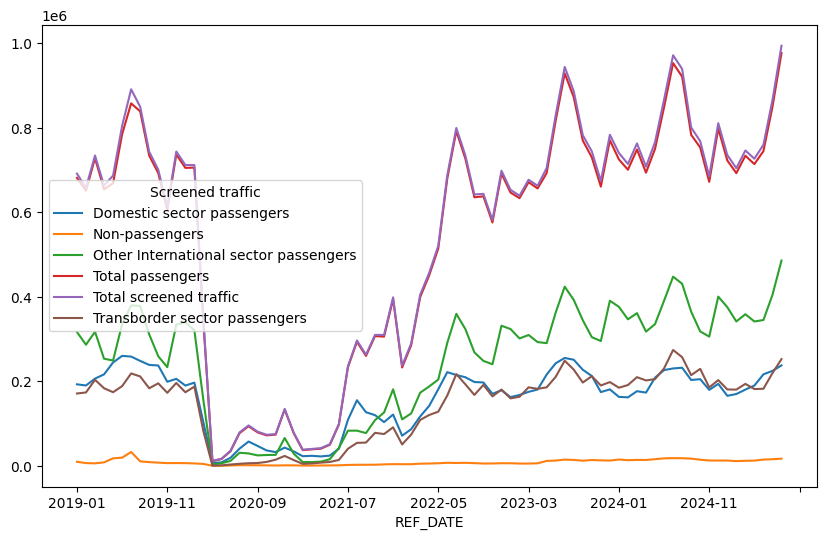

In [30]:
# Einlesen der CSV-Datei der Passagierzahlen vom Flughafen Montréal-Trudeau
flights = pd.read_csv('data/flights_month.csv')

# Filtern nach Montréal/Pierre Elliott Trudeau International, Quebec
flights = flights[flights['GEO'] == 'Montréal/Pierre Elliott Trudeau International, Quebec']

# Nur 'REF_DATE', 'Screened traffic' und 'VALUE' Spalten behalten
flights = flights[['REF_DATE', 'Screened traffic', 'VALUE']]

flights = flights.pivot(index='Screened traffic', columns='REF_DATE', values='VALUE')

# Plotten der Passagierzahlen
flights.T.plot(figsize=(10, 6))